In [27]:
import numpy as np
import matplotlib.pyplot as plt
# BUG CHARLOTTE

# Problem 1: SNR
Background: You are looking for a suspected lurker: a small satellite sneaking up on a much larger communications satellite in geosynchronous earth orbit (GEO). The glare from the GEO satellite overpowers the smaller as it gets close.  

Given: Your camera will use a V-band filter with a bandpass of 80nm, as satellites reflect sunlight which is brightest in the visible. The sunlight reflecting off the GEO satellite appears at magnitude 17 per m2 in the V-band. The lurker is estimated to be the size of a basketball, therefore not very bright. The sky is very dark, but the glare from the GEO causes the background to be magnitude 14 per arcsec2. The overall detection efficiency of your telescope and camera is 25%. You can ignore read noise for now. 

---

A brief review of radiometric quantities in astronomy:
- [F] = photon/m^2/s
- [B] = photon/m^2/s/arcsec^2
- [$\Omega$] = arcsec^2


## a. How bright (in magnitude) do you estimate the lurker to be?

I'm assuming that we are being asked for the total apparent brightness of the lurker, including the signal scattered and reflected by the GEO sattelite. We can arrrive at units of magnitude for the GEO by approximating the cross-sectional area of the GEO to be the squared diameter of a basketball (75cm, source: <https://www.spalding.com.au/basketball-size-guide>)

$$A_{GEO} = 0.5625m^{2}$$
$$m_{v,GEO} = 17*A_{GEO} = 9.5625$$

Conversion must also be done for the background magnitude per arcsec2. We aren't given the solid angle of the GEO, so we must calculate it with the distance to the sattelite. A geosynchronous sattelite has (apparently) a constant altitude of 35,786km (source: https://en.wikipedia.org/wiki/Geosynchronous_orbit) For the basketball diameter above, the equivalent solid angle is:

$$\Omega_{GEO} = \frac{A_{GEO}}{(35786km)^2} = 4.39234264e-16 steradians$$

In arcseconds, 1 $\Omega$ = $4.25 x 10^{10}$ arcsec2.

$$\Omega_{GEO} = 4.39234264e-16 * 4.25e10 = 1.86575e-5 arcsec^2$$

This corresponds to a magnitude of:

$$m_{v,back} = (14 arcsec^{-2}) \Omega_{GEO} = 0.000261205$$

Both must be converted to flux, and then summed on the detector. The remaining calculations are done in the cell below.

$$F_{v,GEO} = F_{0}*10^{m_{v,GEO}/(-2.5)}$$
$$F_{v,back} = F_{0}*10^{m_{v,back}/(-2.5)} $$

In [4]:
F0 = 9.97e10 # zero mag flux in v band
mgeo = 9.5625 # v magnitude of GEO
mbak = 0.000261205 # v magnitude of background
QE = 0.25 # detector quantum efficiency

Fgeo = F0*10**(mgeo/-2.5)
Fbak = F0*10**(mbak/-2.5)
print('GEO Flux = ',Fgeo)
print('Background Flux = ',Fbak)

Ftot = (Fgeo+Fbak)*QE
print('Flux through detector = ',Ftot)

mtot = -2.5*np.log10(Ftot/F0)
print('apparent v magnitude of GEO = ',mtot)

GEO Flux =  14917469.491261495
Background Flux =  99676017189.03244
Flux through detector =  24922733664.630924
apparent v magnitude of GEO =  1.5052487046684528


## b. What exposure time would you need on your camera to achieve an SNR of 3 if you use a 1.0m telescope for your observation, with no AO system. Give the equation for SNR in your answer

The SNR equation (ignoring read noise) is given by:
$$ SNR = \frac{FAt}{\sqrt{FAt + BAt\Omega}} $$

Solving this for the integration time term yields:
$$ t = (\frac{SNR\sqrt{FA + BA\Omega}}{FA})^2$$

In [4]:
SNR = 3
A = np.pi*(1)**2 # telescope area
O =  1.865e-5 # solid angle in as2
QE = 0.25 # Quantum Efficiency

## c. How confident are you in your measurement if you don’t detect a lurker? A detection at SNR of 3 means the signal is 3 standard deviations above the noise level. 

## d.	With an AO system running, what parameter(s) change in your SNR calculation and what integration time is needed to reach a detection with an SNR of 5? 

## e.	Repeat the observation on a 3m telescope with an AO system. What integration time would you need for an SNR of 5? 

# Problem 2: Read Noise
Background: Camera sensors make the detection of faint sources difficult because of the presence of read noise. Every time the electronics read a pixel, the value has an uncertainty based on thermal processes in the semiconductor material. This noise is quantified as the standard deviation of the measured signal in electrons. Since each detected photon gives a single electron, read noise can be thought of as an uncertainty in the number of photons detected.

Given: A point source of magnitude 22 is against a sky background of magnitude of 20 per arcsec2. The detector has read noise of 3 electrons rms.


## a.	If a source is spread over a square of NxN pixels, what is the standard deviation of the read noise?
Hint: Noise is a random process. Each time a pixel is read, the uncertainty is uncorrelated with every other pixel readout. How do the standard deviations of two (or more) statistically independent random variables combine?


In [ ]:
R = 3
N = 1024 # npix in one dimension (example)
Rtot = 3*N**2

## b.	What is the required integration time for a sensor with non-zero read noise to yield a detection with given SNR? Your answer should be an equation. 

$$SNR^{2}(FAt + BAt\Omega + nR^{2}) = (FA)^2t^2$$
$$(FA)^2t^2 - SNR^2(FA+BA\Omega)t - SNR^2nR^2 = 0$$
$$t = \frac{-SNR^2(FA+BA\Omega)\pm\sqrt{SNR^4(FA+BA\Omega)^2 - 4((FA)^2)(SNR^2nR^2)}}{2(FA)^2}$$

## c.	What is the angular subtense of a pixel on the sky needed to make the lowest noise detection of this source on a 1.0m telescope with AO?

Sampling at half the nyquist limit will yield the lowest noise contribution without loosing information in our image. Assuming $\lambda = 0.545\mu m$

$$\Theta = \frac{\lambda}{2D} = 0.545e-6 radians = 0.056 arcsec$$

## d.	Given this angular pixel scale, with the AO running, what is the integration time to reach an SNR of 5? Assume we need N=5 pixels to capture the whole source. 

I'm going to assume our magnitude is given in the v-band, so I will be using the zero point flux of $F_{0} = 9.97e10$

In [46]:
F0 = 9.97e10
msrc = 22
mbak = 20*(0.056)
Fsrc = F0*10**(msrc/(-2.5))
Fbak = F0*10**(mbak/(-2.5))
SA = 0.056**2 # nyquist limit squared with AO
R = 3
n = 5**2
SNR = 5
A = np.pi*(0.5)**2
t = (SNR**2 *(Fsrc*A + Fbak*A*SA)+(np.sqrt((SNR**2 *(Fsrc*A + Fbak*A*SA))**2 - (4*(Fsrc*A)**2 *(SNR**2 * n * R**2)))))/(2*(Fsrc*A)**2)
print(t)

142079.5715368936


## e.	Without the AO system, the PSF will blur. Without changing the pixel’s angular scale, how many are needed to capture the whole source? 

## f.	Including these pixels, what is the integration time to reach an SNR of 5 now? 

# Problem 3: Atmosphere Characterization
Background: To accurately design a laser-guided AO system for a telescope, a site survey must be conducted to establish atmospheric characteristics. There are the Cn2 profile as well as the wind speed profile, both a function of height above the ground.  Use weighted path integrals of the Cn2 profile with respect to various quantities. For example, the jth weighted integral of Cn2 with respect to height h is given in the following equation:
$$ \int_{0}^{\infty} C_{n}^{2} h^{j} dh $$
Assume the Cn2 profile also obeys the Hufnagel-Valley form. Wind speed is given by the following formula, described as a Bufton wind profile:
$$ v(h) = v(0) + v(h_{trop})exp[-(\frac{h-h_{trop}}{s})^2] $$

Given: The following values should be used to establish the atmospheric characteristics.
- Cn2(0) = 10e-16 m e-2/3	Ground Cn2
- v(0) = 5 m/s		Ground wind speed
- htrop = 9400 m		Height of the tropopause
- s = 4800 m		Scale height of the tropopause
- v(htrop) = 15 m/s	Wind speed at the tropopause




## a.	Calculate and plot the wind speed profile from the ground to 20km. 

In [ ]:
cn2 = 10e-16 # m^(-2/3)
v0 = 5 # m/s ground speed


## b.	What is the peak wind speed? 

## c.	Calculate and plot the Cn2 profile. Make the x-axis logarithmic.
Note: You will need the peak wind speed in the tropopause for this. It sets the strength of turbulence in the high-altitude shear layer. 


## d.	Calculate r0 at a wavelength of 500 nm. 

## e.	Calculate the mean wind speed from the 5/3 weighted integral of Cn2 with respect to v(h) normalized by the integral of Cn2. 

## f.	Calculate the mean height from the normalized 5/3 weighted integral of Cn2 with respect to h. 

## g.	Using the mean wind speed and mean height, calculate the isoplanatic angle $\theta_o$ in arcseconds. 

## h.	Calculate the atmospheric time constant $\tau_o$ 

# Problem 4: PSF Behavior 
The following problem will compute the point-spread function (PSF) for an aberrated and unaberrated circular aperture. Run the following commands before starting to initialize the same random number generator. 

Matlab: >>rng(101);
Python: >>numpy.random.seed(86)

Begin by creating a circular aperture as a 2-D array. Make the array size 1024x1024 pixels and the aperture diameter 256 pixels. The aperture should look like the following image:


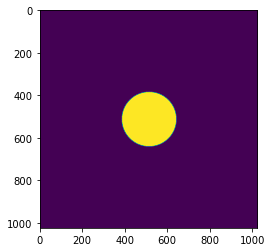

In [7]:
## CREATE CIRCULAR APERTURE

ap = np.zeros((1024,1024),dtype='float')
for xind in range(1024):
    for yind in range(1024):
        
        if np.sqrt((xind-512)**2+(yind-512)**2) <= 128:
            
            ap[xind,yind] = 1
            
plt.imshow(ap)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 31 11:31:50 2020

@author: Charlotte E. Guthery

"""
def kolphaseClass(s):
    #phase=kolphaseClass(s)
    # Returns a random Kolmogorov phase screen of dimension s x s computed 
    # from the FT of random complex numbers with appropriate amplitudes. 
    # Screens are computed on a grid of size 2s, with a s x s piece cut out. 
    # This helps overcome the problem with this techniqe of under-representing 
    # tilt. Tandom tilts are also explicity added to give a reasonable 
    # approximation of the overall Kolmogorav structure function on all scales.
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ph=np.zeros([s,s,2]) #initialize phase variable
    [x,y]=np.meshgrid(range(-s,s),range(-s,s))
    r=np.sqrt(np.multiply(x,x)+np.multiply(y,y)) #make a radial ordinate
    
    f1=np.random.randn(2*s,2*s) #make two sets of gaussian random numbers
    f2=np.random.randn(2*s,2*s)

    f=f1+1j*f2 #turn the two random numbers into a complex random number
    ps=np.power(r,-11/6) #Kolomogorov power spectrum amplitude
    ps[s][s]=0; #setting the centr of the power spectrum (DC term) to zero
    
    scale=15.2 #this number makes the tilts work out 

    xt=np.random.randn(2)*(scale/s) #random amplitudes for tip and tilt to 
    yt=np.random.randn(2)*(scale/s) #mitigate power spectral rolloff at low frequencies 

    #This has Kolmogorov phases in real and imaginary parts
    sc= np.fft.fft2(np.fft.fftshift(np.multiply(np.multiply(np.abs(f),ps),np.exp(1j*np.angle(f))))) 

    #seperating the real and imaginary parts
    ph[:,:,0]=np.real(sc[0:s,0:s])+xt[0]*x[0:s,0:s]+yt[0]*y[0:s,0:s]
    ph[:,:,1]=np.real(sc[0:s,0:s])+xt[1]*x[0:s,0:s]+yt[1]*y[0:s,0:s]
    
    #make the mean phase zero
    ph[:,:,0]=ph[:,:,0]-np.mean(ph[:,:,0])
    ph[:,:,1]=ph[:,:,1]-np.mean(ph[:,:,1])
    
    #pick just one of the two phase screens for present purposes scale to 
    #something that will give reasonable ansewrs on a 1024 grid with 256 pupil
    ph=ph[:,:,1]*3
    
    return ph 


## a.	Compute the incoherent PSF for this aperture assuming no aberrations. What is the full width half max (FWHM) of the central core in pixels? 
Note: The best way to do this is to compute an azimuthal average of the PSF. Do not just guess by eye. 


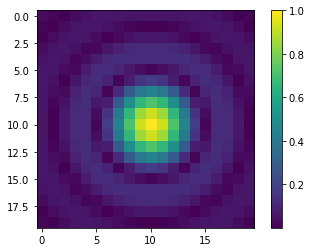

In [23]:
# a little bit of aliasing is noticeable
psf = np.fft.fftshift((np.abs(np.fft.fft2((ap)))))
psf = psf/np.max(psf) # normalize the psf by the peak
plt.imshow(psf[512-10:512+10,512-10:512+10])
plt.colorbar()
# [512-40:512+40,512-40:512+40]



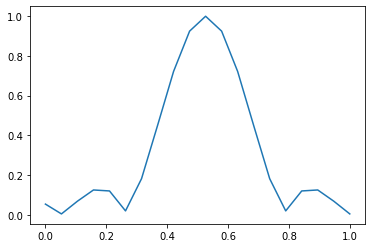

[0.05343704 0.00397557 0.06813704 0.1246569  0.11969687 0.01917864
 0.18145436 0.44951158 0.72188154 0.92490475 1.         0.92490475
 0.72188154 0.44951158 0.18145436 0.01917864 0.11969687 0.1246569
 0.06813704 0.00397557]


In [26]:
# find the cross-section
slice_psf = psf[512-10:512+10,512]
x = np.linspace(0,1,len(slice_psf))
plt.plot(x,slice_psf)
plt.show()

print(slice_psf)

## b.	How does the width change if you reduce the diameter of the aperture to 128 pixels? Make sure to keep the array at 1024x1024 pixels. 

## c.	How would you expect the width of the PSF to change if the diameter of the aperture were doubled? 

## d.	Attach an image of both PSFs. You may need to display only the central portion of the array to see the details. Also include a line plot of the intensities through the brightest pixel. 

Run the kolphaseClass script to create a 1024x1024 array and assign it to an output variable phi. Use the help function to display the syntax of the routine. 


## e. Attach the resulting image

## f.	Compute the PSF for the 256 pixel aperture with phi as the phase of the electric field. Make sure to model both the amplitude and phase of the electric field. Write down the equation used to compute this PSF. Attach the image of the aberrated PSF

## g.	The PSF now has a speckled appearance. What is the approximate FWHM of each speckle? 

## h.	How does this compare to the FWHM value from part a? 

## i.	Compute an aberrated PSF for 1000 different realizations of phase. Record each phase and corresponding PSF. Find the average PSF of all realizations and attach it. 
Note: Repeatedly calling kolphaseClass through a for-loop will create a different phase every time. 


## j.	What is the approximate FWHM of the averaged PSF in pixels? 

## k.	Calculate the structure function for each of the 1000 different phase realizations. Find the average structure function and calculate the r0 value of this dataset. 

## l.	Compute the corresponding Cn2 value. 